In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [4]:
file = open("/content/drive/MyDrive/Datasets/blue_castle.txt", "r", encoding = "utf8" )

# Read the all lines from file store in list
lines = []
for i in file:
     lines.append(i)

# Combines all lines into one big string using double spaces '  ' as separators.
data = ""
for i in lines:
    data = '  '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split() # Splits the text into words (removes all types of extra/multiple spaces).
data = ' '.join(data) # Puts the words back together with single spaces.
data[:500]

'The Project Gutenberg eBook of The Blue Castle, by Lucy Maud Montgomery This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before usi'

In [5]:
len(data)

402906

In [6]:
len(data.split())

71314

In [7]:
import pickle

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data]) # Read the data and builds words index for each word

pickle.dump(tokenizer, open('token.pkl','wb'))

# Converts the full text into a sequence of numbers using the tokenizer’s word index.
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 112, 97, 587, 4, 1, 94, 147, 58, 2383, 2384, 1818, 51, 587, 42]

In [9]:
len(sequence_data)

72052

In [10]:
vocab_size =len(tokenizer.word_index) + 1
print(vocab_size)

8413


Uses a sliding window of size 4 to create sequences of 4 words.

- The first 3 words will be inputs.

- The 4th word will be the target (the next word to predict).

- Example: If sequence_data is [5, 10, 20, 7, 3, 12], this loop creates:

  - [5, 10, 20, 7]

  - [10, 20, 7, 3]

  - [20, 7, 3, 12]

In [11]:
import numpy as np
sequences = []

for i in range (3, len(sequence_data)):
  words = sequence_data[i-3:i+1]
  sequences.append(words)

print("The Length if sequences are:" , len(sequences))
sequences = np.array(sequences)
sequences[:10]


The Length if sequences are: 72049


array([[   1,  112,   97,  587],
       [ 112,   97,  587,    4],
       [  97,  587,    4,    1],
       [ 587,    4,    1,   94],
       [   4,    1,   94,  147],
       [   1,   94,  147,   58],
       [  94,  147,   58, 2383],
       [ 147,   58, 2383, 2384],
       [  58, 2383, 2384, 1818],
       [2383, 2384, 1818,   51]])

X - will hold the first 3 tokens of each sequence (the input words).

y - will hold the 4th token (the word to predict next).

In [12]:
X = []
y = []

for i in sequences:
  X.append(i[0:3])
  y.append(i[3])

X = np.array(X)
y = np.array(y)

In [13]:
print("Data:", X[:10])
print("Response:", y[:10])

Data: [[   1  112   97]
 [ 112   97  587]
 [  97  587    4]
 [ 587    4    1]
 [   4    1   94]
 [   1   94  147]
 [  94  147   58]
 [ 147   58 2383]
 [  58 2383 2384]
 [2383 2384 1818]]
Response: [ 587    4    1   94  147   58 2383 2384 1818   51]


**One-Hot Encoding the Target (y)** <br>
to_categorical: Converts integer labels (word indices) into one-hot encoded vectors.

num_classes=vocab_size: Ensures each word index is represented in a vector of length equal to the total number of unique words (vocabulary size).

In [14]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation= "relu"))
model.add(Dense(vocab_size, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

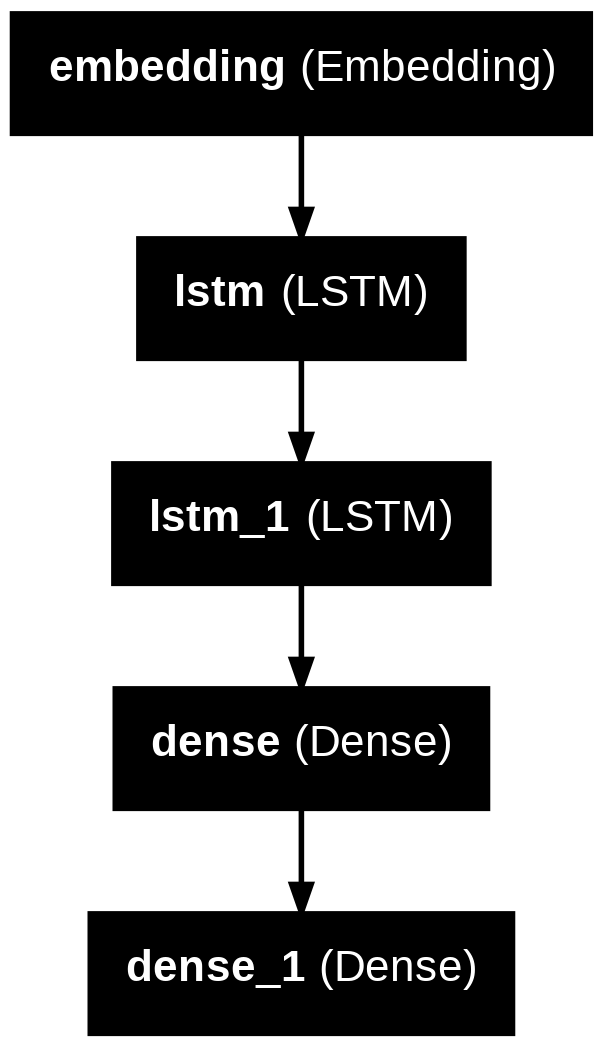

In [17]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model

model.build(input_shape=(None, 3))

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics = ['accuracy'])
model.fit(X, y, epochs=10, batch_size=32, callbacks=[checkpoint])

Epoch 1/10
2250/2252 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8909 - loss: 0.3032
Epoch 1: loss improved from inf to 0.35524, saving model to next_words.h5


2252/2252 ━━━━━━━━━━━━━━━━━━━━ 56s 24ms/step - accuracy: 0.8909 - loss: 0.3032
Epoch 2/10
2251/2252 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8930 - loss: 0.2842
Epoch 2: loss improved from 0.35524 to 0.32270, saving model to next_words.h5


2252/2252 ━━━━━━━━━━━━━━━━━━━━ 54s 24ms/step - accuracy: 0.8930 - loss: 0.2843
Epoch 3/10
2250/2252 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8912 - loss: 0.2895
Epoch 3: loss did not improve from 0.32270
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.8912 - loss: 0.2895
Epoch 4/10
2251/2252 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8918 - loss: 0.2860
Epoch 4: loss improved from 0.32270 to 0.32208, saving model to next_words.h5


2252/2252 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.8918 - loss: 0.2860
Epoch 5/10
2251/2252 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8915 - loss: 0.2868
Epoch 5: loss improved from 0.32208 to 0.31907, saving model to next_words.h5


2252/2252 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.8915 - loss: 0.2868
Epoch 6/10
2251/2252 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8903 - loss: 0.2868
Epoch 6: loss did not improve from 0.31907
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - accuracy: 0.8903 - loss: 0.2869
Epoch 7/10
2250/2252 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8910 - loss: 0.2833
Epoch 7: loss improved from 0.31907 to 0.31773, saving model to next_words.h5


2252/2252 ━━━━━━━━━━━━━━━━━━━━ 53s 24ms/step - accuracy: 0.8910 - loss: 0.2834
Epoch 8/10
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8904 - loss: 0.2771
Epoch 8: loss improved from 0.31773 to 0.30851, saving model to next_words.h5


2252/2252 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.8904 - loss: 0.2771
Epoch 9/10
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8902 - loss: 0.2825
Epoch 9: loss did not improve from 0.30851
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - accuracy: 0.8902 - loss: 0.2825
Epoch 10/10
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8936 - loss: 0.2705
Epoch 10: loss improved from 0.30851 to 0.30566, saving model to next_words.h5


2252/2252 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 0.8936 - loss: 0.2705


**Prediction**

In [27]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle
import time

# Load the model and tokenizer
model = load_model('/content/next_words.h5')
tokenizer = pickle.load(open('/content/token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text, num_words=10):
    for _ in range(num_words):
        # Tokenize the input text
        sequence = tokenizer.texts_to_sequences([text])[0]

        # Take only the last 3 words
        sequence = sequence[-3:]

        # Pad sequence if it's less than 3 tokens
        while len(sequence) < 3:
            sequence.insert(0, 0)

        sequence = np.array(sequence).reshape(1, 3)

        # Predict the next word
        preds = np.argmax(model.predict(sequence), axis=-1)[0]

        # Get the word from the index
        predicted_word = ''
        for word, index in tokenizer.word_index.items():
            if index == preds:
                predicted_word = word
                break

        # Append to the text
        text += ' ' + predicted_word
        print(text)
        time.sleep(1)
    return text

# Input
input_text = input("Enter your line: ")
print(f"\nNext 10 words of: '{input_text}'")
completed_text = Predict_Next_Words(model, tokenizer, input_text, num_words=10)


Enter your line: This program is good

Next 10 words of: 'This program is good'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
This program is good mrs
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
This program is good mrs frederick
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
This program is good mrs frederick was
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
This program is good mrs frederick was almost
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
This program is good mrs frederick was almost driven
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
This program is good mrs frederick was almost driven to
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
This program is good mrs frederick was almost driven to believe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
This program is good mrs frederick was almost driven to believe that
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
This program is good mrs frederick was almost driven to believe that she
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
This program is good mrs frederick was almost driven to believe that she must
